In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

<div style="background-color: skyblue; padding: 10px; border-radius: 5px; font-weight: bold;">
    1. Load the data set and run some exploretory analysis over the data
</div>

In [27]:
df = pd.read_excel("2_insurance_claims_clean.xlsx")

In [28]:
# Display the first few rows of the dataframe
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,Unknown,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N


In [29]:
# Display summary information about the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           999 non-null    int64         
 1   age                          999 non-null    int64         
 2   policy_number                999 non-null    int64         
 3   policy_bind_date             999 non-null    datetime64[ns]
 4   policy_state                 999 non-null    object        
 5   policy_csl                   999 non-null    object        
 6   policy_deductable            999 non-null    int64         
 7   policy_annual_premium        999 non-null    float64       
 8   umbrella_limit               999 non-null    int64         
 9   insured_zip                  999 non-null    int64         
 10  insured_sex                  999 non-null    object        
 11  insured_education_level      999 non-null    

In [30]:
print(df.isna().sum())

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [31]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,204.158158,38.969970,546044.174174,1134.134134,1256.880951,1.102102e+06,501274.399399,25089.78979,-26779.379379,11.649650,1.836837,0.991992,1.487487,52767.596137,7436.292572,7400.095677,37940.410410,2005.106106
std,114.989557,9.128184,257118.152865,610.960368,243.990558,2.298293e+06,71712.477736,27862.47496,28114.522724,6.952557,1.017091,0.820538,1.111785,26412.983291,4883.118905,4827.036718,18892.233354,6.018072
min,1.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.00000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,116.000000,32.000000,335913.500000,500.000000,1090.485000,0.000000e+00,448451.000000,0.00000,-51500.000000,6.000000,1.000000,0.000000,1.000000,41925.000000,4290.000000,4440.000000,30395.000000,2000.000000
50%,200.000000,38.000000,532330.000000,1000.000000,1257.040000,0.000000e+00,466498.000000,0.00000,-22400.000000,12.000000,1.000000,1.000000,1.000000,58140.000000,6780.000000,6750.000000,42120.000000,2005.000000
75%,276.500000,44.000000,759459.500000,2000.000000,1415.710000,0.000000e+00,603254.000000,51000.00000,0.000000,17.000000,3.000000,2.000000,2.000000,70555.000000,11310.000000,10890.000000,50845.000000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.00000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


<div style="background-color: skyblue; padding: 10px; border-radius: 5px; font-weight: bold;">
    2. Feature engineering and creating additional features
</div>

<div style="background-color: lightgrey; padding: 10px; border-radius: 5px; font-weight: bold;">
    2.1 Let's look at the distriubtion of claims by age, this may throw up some interesting insights
</div>    

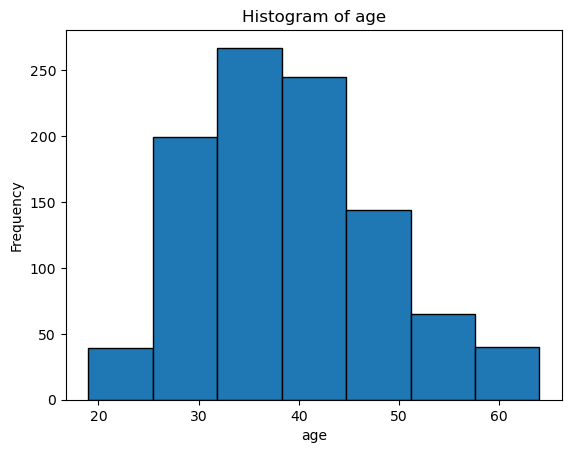

In [32]:
# Choose the column for the histogram
column_name = 'age'

# Plot the histogram
plt.hist(df[column_name], bins=7, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

 From the analysis above, we can use this to generate age groupings that'll allow better presentation of insights later on

In [33]:
df['age_group'] = pd.cut(df['age'], bins=[0, 24, 34, 44, 54, 64, 100], labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+'])

In [34]:
# Test the dataframe to ensure that the new age groupings come through as expected

df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,age_group
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,45-55
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,Unknown,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,35-45
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,25-35
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,35-45
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,35-45


<div style="background-color: lightgrey; padding: 10px; border-radius: 5px; font-weight: bold;">
    2.2 Let's create some additional features within the Insurance dataframe that will allow for further KPIs and analysis in a Power BI app
</div>

In [35]:
df["Contract Years"] = df["months_as_customer"]/12
df['total_premiums_paid'] = (df['policy_annual_premium']/12) * df['months_as_customer']
df['net_value_of_customer'] = df['total_premiums_paid'] - df['total_claim_amount']
df['policy_bind_year'] = df['policy_bind_date'].dt.year
df['incident_year'] = df['incident_date'].dt.year
df['incident_month'] = df['incident_date'].dt.month
df['incident_day'] = df['incident_date'].dt.day
df['incident_day_of_week'] = df['incident_date'].dt.dayofweek
df['premium_per_year'] = df['policy_annual_premium'] / df['Contract Years']
df['claim_to_premium_ratio'] = df['total_claim_amount'] / df['total_premiums_paid']
df['fraudulent_claim_amount'] = df.apply(lambda row: row['total_claim_amount'] if row['fraud_reported'] == 'Y' else 0, axis=1)

In [36]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_premiums_paid,net_value_of_customer,policy_bind_year,incident_year,incident_month,incident_day,incident_day_of_week,premium_per_year,claim_to_premium_ratio,fraudulent_claim_amount
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,38455.540000,-33154.460000,2014,2015,1,25,6,51.472317,1.862150,71610.0
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,22747.180000,17677.180000,2006,2015,1,21,2,63.011579,0.222885,5070.0
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,15780.063333,-18869.936667,2000,2015,2,22,6,126.549851,2.195809,0.0
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,30202.453333,-33197.546667,1990,2015,1,10,5,66.362813,2.099167,63400.0
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,30094.290000,23594.290000,2014,2015,2,17,1,83.363684,0.215988,0.0


<div style="background-color: lightgrey; padding: 10px; border-radius: 5px; font-weight: bold;">
    2.3 Use the new features to analyse the data further and identify some trends that we can look to build our analysis off of
</div>

**Analyse the distribution of total claims**

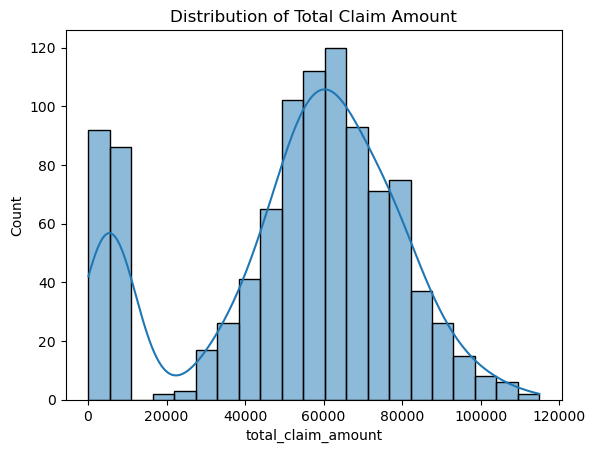

In [37]:
# Distribution of total_claim_amount
sns.histplot(df['total_claim_amount'], kde=True)
plt.title('Distribution of Total Claim Amount')
plt.show()

**Forbes reports that the a significant issue in the American insurance market is fraudulent claims**

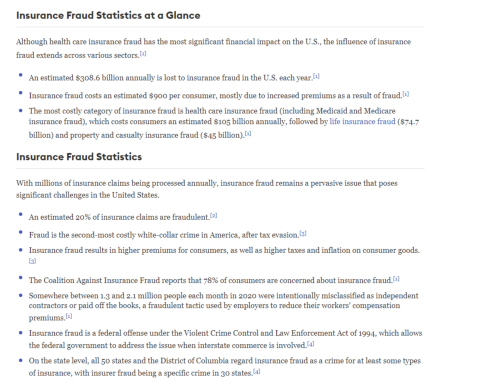

In [44]:

image1 = mpimg.imread('forbes_insurance_stats1.png')
plt.imshow(image1)
plt.axis('off')  # Turn off axis labels
plt.show()

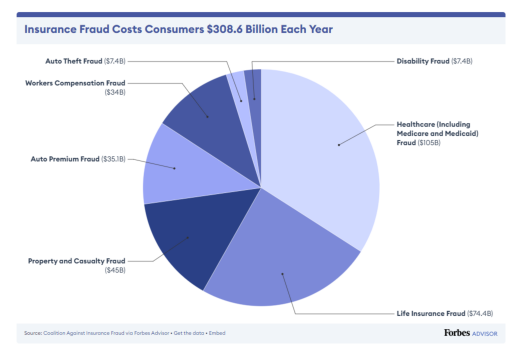

In [43]:
image2 = mpimg.imread('forbes_insurance_stats2.png')
plt.imshow(image2)

plt.axis('off')  # Turn off axis labels
plt.show()

**So lets run some analysis over our data set against the "fraudulent_claim_amount" column**

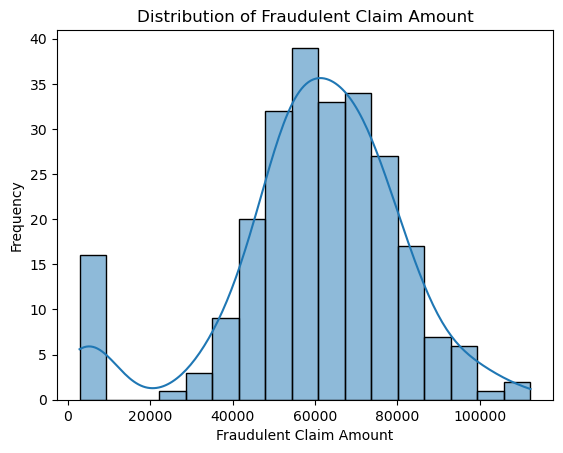

In [46]:
# Filter the DataFrame to include only rows where fraudulent_claim_amount is greater than 0
fraudulent_claims = df[df['fraudulent_claim_amount'] > 0]

# Plot the distribution of fraudulent_claim_amount
sns.histplot(fraudulent_claims['fraudulent_claim_amount'], kde=True)
plt.title('Distribution of Fraudulent Claim Amount')
plt.xlabel('Fraudulent Claim Amount')
plt.ylabel('Frequency')
plt.show()

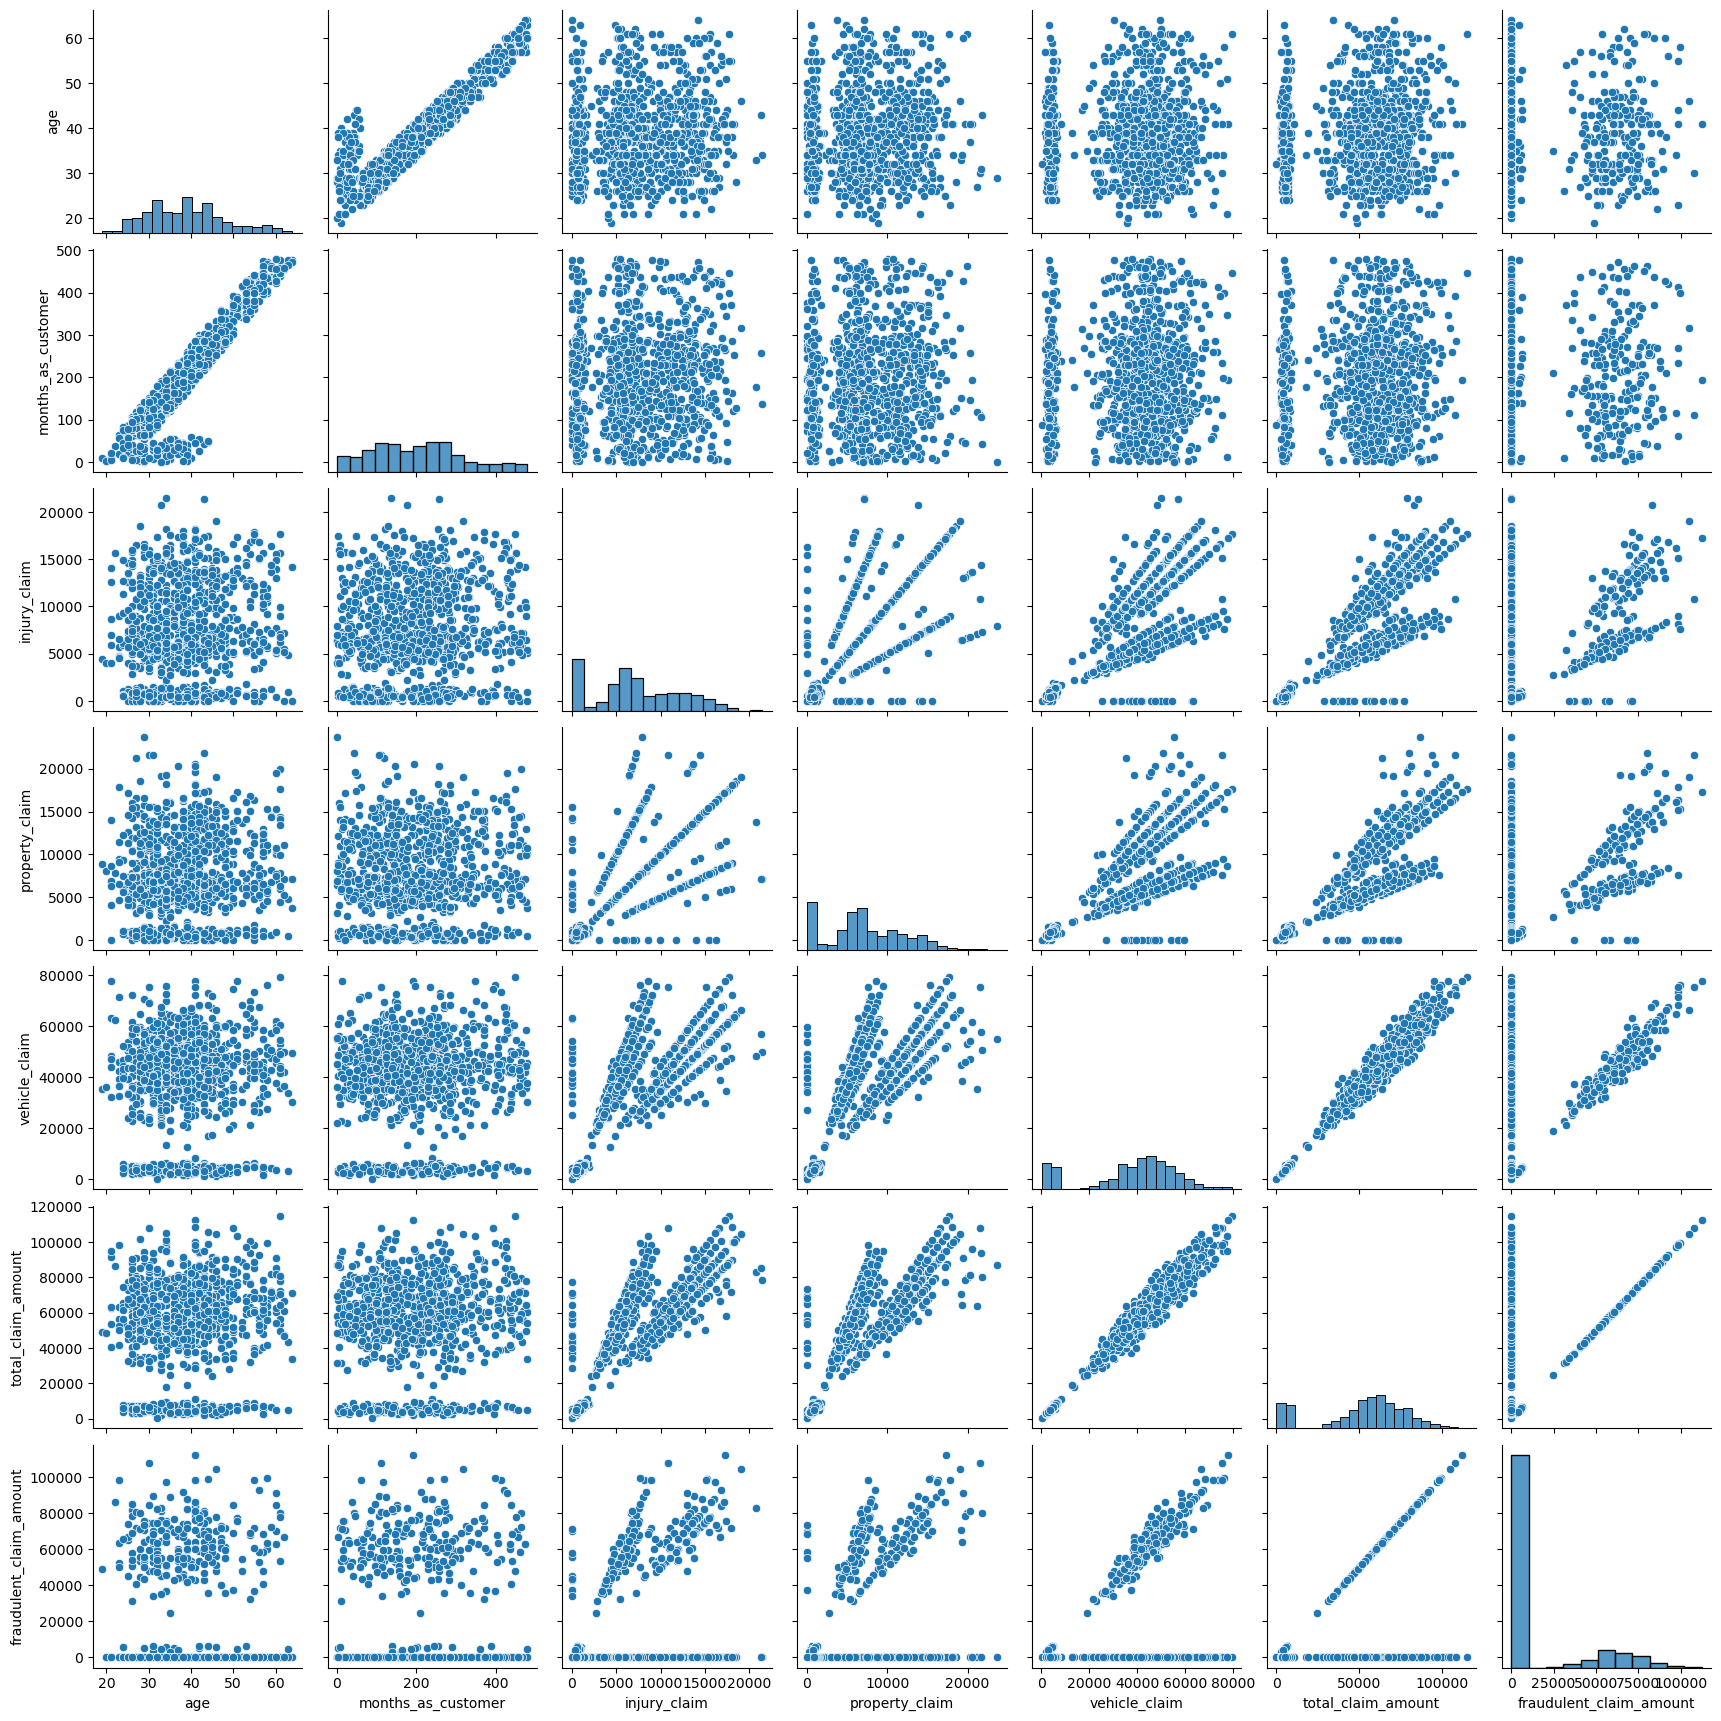

In [51]:
# Pair plot
sns.pairplot(df[['age', 'months_as_customer', 'injury_claim', 'property_claim', 'vehicle_claim','total_claim_amount', 'fraudulent_claim_amount']])
plt.show()

**Let's now search for further data correlations**

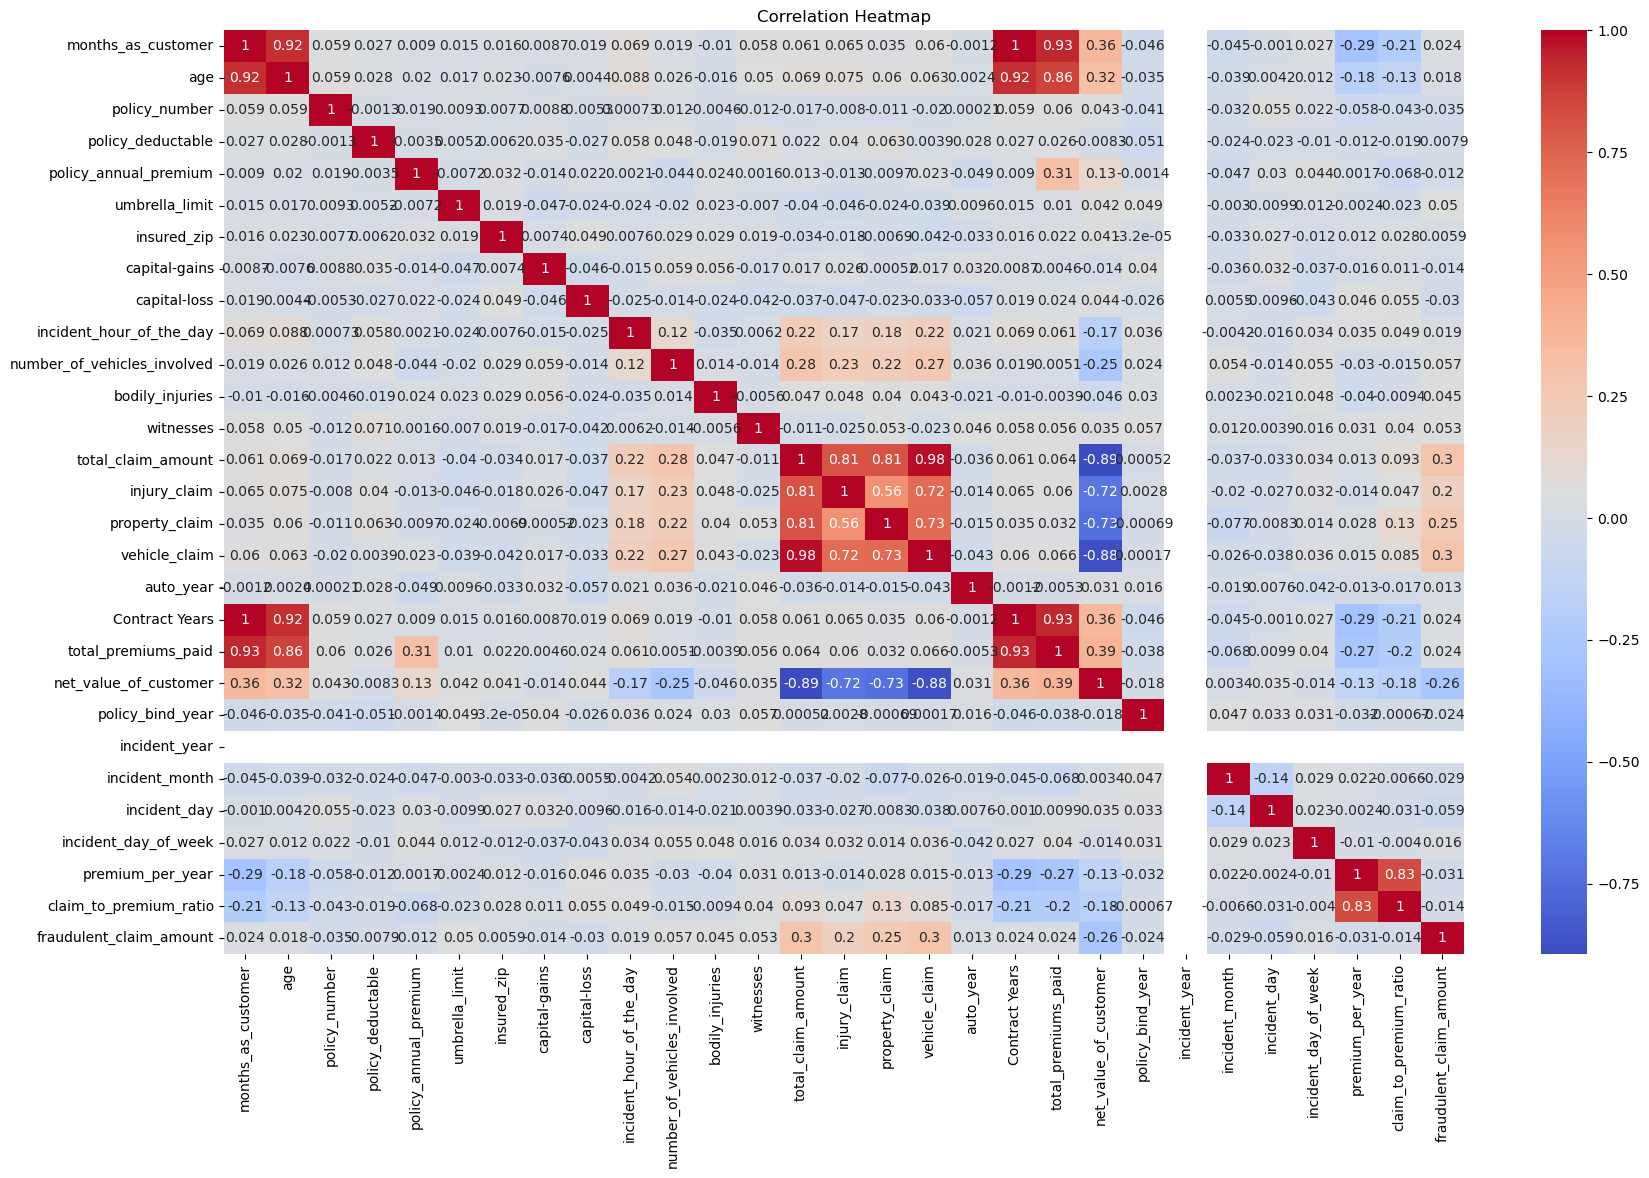

In [53]:
# Calculate correlations
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Let's have a deeper look into potential fraud issues**

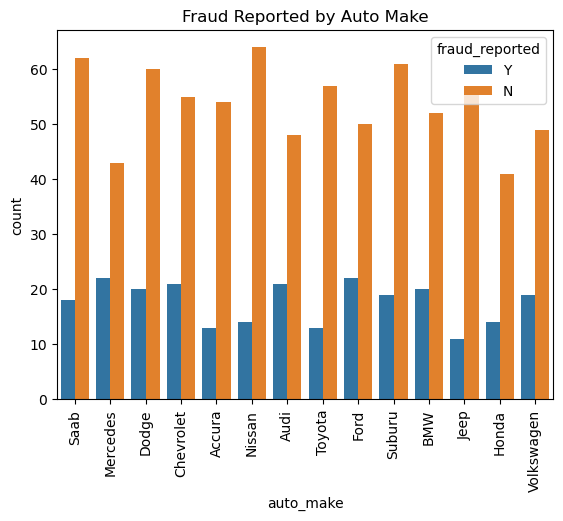

In [56]:
# Bar plot for auto_make vs. fraud_reported
sns.countplot(x='auto_make', hue='fraud_reported', data=df)
plt.title('Fraud Reported by Auto Make')
plt.xticks(rotation=90)
plt.show()

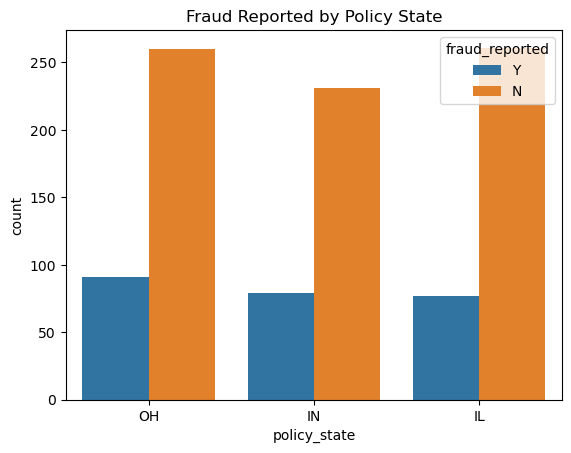

In [57]:
# Bar plot for policy_state vs. fraud_reported
sns.countplot(x='policy_state', hue='fraud_reported', data=df)
plt.title('Fraud Reported by Policy State')
plt.show()


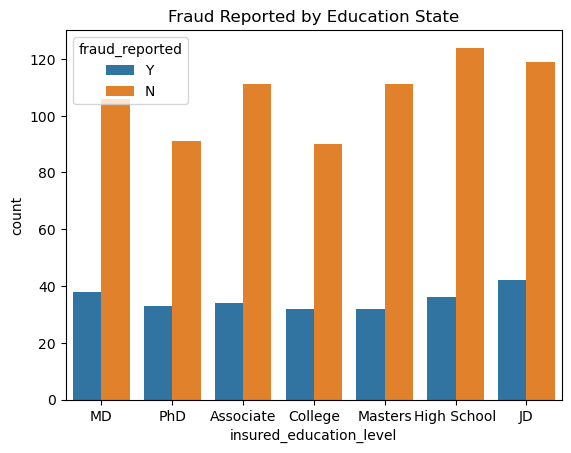

In [58]:
# Bar plot for insured_education_level vs. fraud_reported
sns.countplot(x='insured_education_level', hue='fraud_reported', data=df)
plt.title('Fraud Reported by Education State')
plt.show()

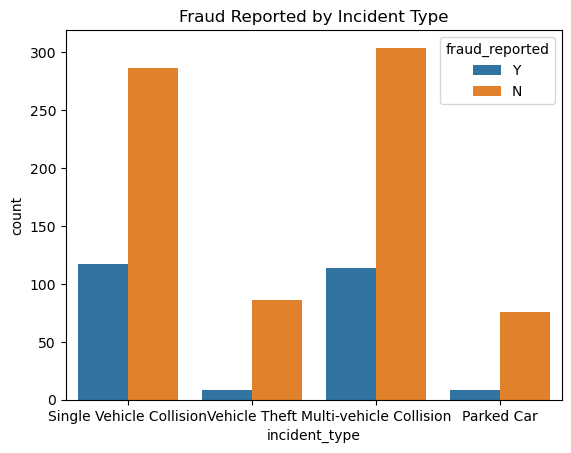

In [59]:
# Bar plot for incident_type vs. fraud_reported
sns.countplot(x='incident_type', hue='fraud_reported', data=df)
plt.title('Fraud Reported by Incident Type')
plt.show()

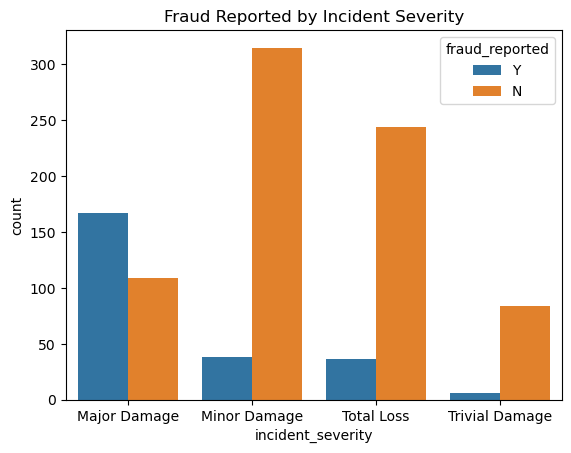

In [60]:
# Bar plot for incident_severity vs. fraud_reported
sns.countplot(x='incident_severity', hue='fraud_reported', data=df)
plt.title('Fraud Reported by Incident Severity')
plt.show()

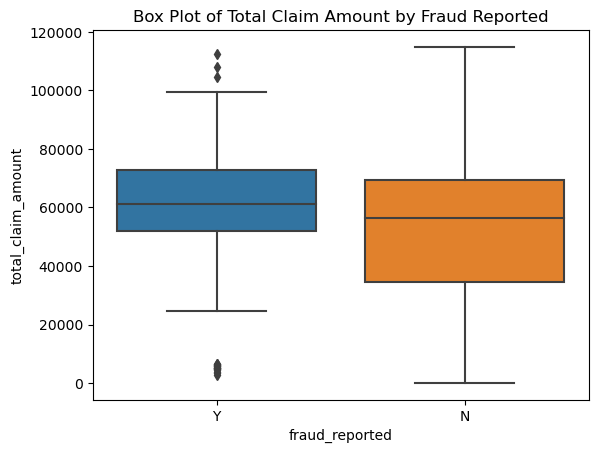

In [61]:
sns.boxplot(x='fraud_reported', y='total_claim_amount', data=df)
plt.title('Box Plot of Total Claim Amount by Fraud Reported')
plt.show()

<div style="background-color: skyblue; padding: 10px; border-radius: 5px; font-weight: bold;">
    3. Let's build a model to predict potential fraud from a client profile
</div>

In [76]:
#One hot encoding on all categorical features
df_encoded = pd.get_dummies(df, columns=[
    'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 
    'insured_occupation', 'insured_hobbies', 'insured_relationship', 
    'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 
    'incident_state', 'incident_city', 'incident_location', 'property_damage', 
    'police_report_available', 'auto_make', 'auto_model', 'fraud_reported'
])

# Drop the 'policy_bind_date' column
df_encoded.drop('policy_bind_date', axis=1, inplace=True)

# Drop the 'indcident_date' column
df_encoded.drop('incident_date', axis=1, inplace=True)

# Drop the 'age_group' column
df_encoded.drop('age_group', axis=1, inplace=True)

# Drop the 'fraud_reported_N' column
df_encoded.drop('fraud_reported_N', axis=1, inplace=True)

# Drop the 'fraudulent_claim_amount' column
df_encoded.drop('fraudulent_claim_amount', axis=1, inplace=True)

In [77]:
df_encoded.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,fraud_reported_Y
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,...,0,0,0,0,0,0,0,0,0,1
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,...,0,0,0,0,0,0,0,0,0,1
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,...,1,0,0,0,0,0,0,0,0,0
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,...,0,0,0,0,1,0,0,0,0,1
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,...,0,1,0,0,0,0,0,0,0,0


In [78]:
# Normalize or scale your data if necessary
scaler = StandardScaler()
df_encoded[df_encoded.columns] = scaler.fit_transform(df_encoded[df_encoded.columns])

# Define X and y
X = df_encoded.drop('fraud_reported_Y', axis=1)
y = df_encoded['fraud_reported_Y']

# Select the top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_top = selector.fit_transform(X, y)

# Get the columns of the top features
top_feature_indices = selector.get_support(indices=True)
top_features = X.columns[top_feature_indices]
print("Top 10 Features:", top_features)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Encode y_train using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialize RandomForestClassifier with top features
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using y_train_encoded
model.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Encode y_test using LabelEncoder if not already binary
y_test_encoded = label_encoder.transform(y_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))
print("Classification Report:\n", classification_report(y_test_encoded, y_pred))
print("Accuracy Score:", accuracy_score(y_test_encoded, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [22] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Top 10 Features: Index(['total_claim_amount', 'property_claim', 'vehicle_claim',
       'net_value_of_customer', 'insured_hobbies_chess',
       'insured_hobbies_cross-fit', 'collision_type_Unknown',
       'incident_severity_Major Damage', 'incident_severity_Minor Damage',
       'incident_severity_Total Loss'],
      dtype='object')
Confusion Matrix:
 [[129  19]
 [ 20  32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       148
           1       0.63      0.62      0.62        52

    accuracy                           0.81       200
   macro avg       0.75      0.74      0.75       200
weighted avg       0.80      0.81      0.80       200

Accuracy Score: 0.805


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [22] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


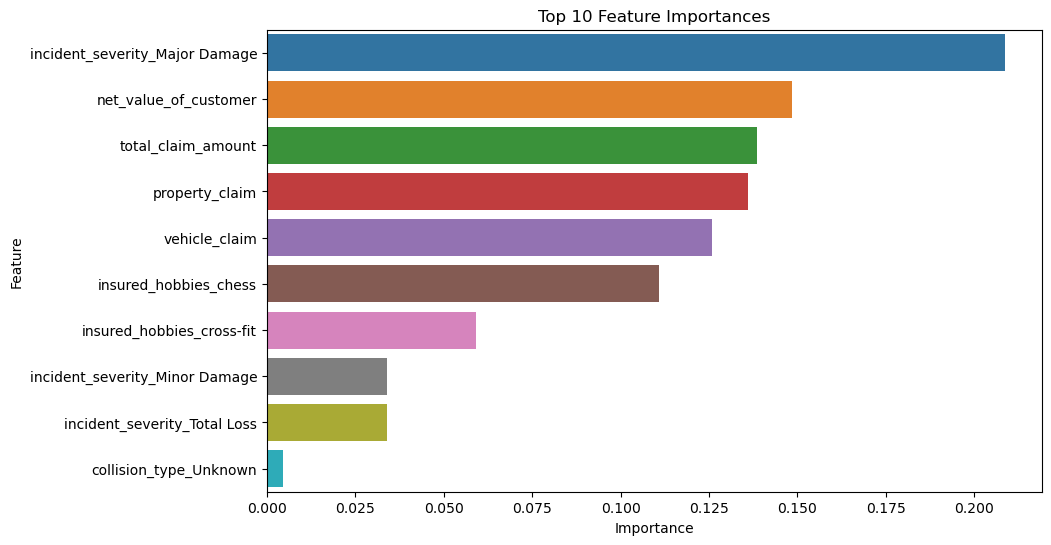

In [79]:
importances = model.feature_importances_

# Get the columns of the top features
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X, y)
top_features = X.columns[selector.get_support()]

# Create DataFrame with feature names and importances for top features
feature_importance_df = pd.DataFrame({'Feature': top_features, 'Importance': importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

<div style="background-color: skyblue; padding: 10px; border-radius: 5px; font-weight: bold;">
    4. Save the both dataframes as a csv files for use in PowerBI
</div>

In [80]:
df.to_csv("3_insurance_claims_python_processed_primary.csv", index=False)
df.to_csv("4_insurance_claims_python_processed_encoded.csv", index=False)